In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, sobel

In [2]:
def Conv(K, A):
    """
    K, A both 3x3 matrices
    """
    if len(A.shape) == 3:
        C = np.zeros((3))
        for i in range(3):
            for j in range(3):
                C += K[i,j] * A[i,j,:]
    elif len(A.shape) == 2:
        C = 0
        for i in range(3):
            for j in range(3):
                C += K[i,j] * A[i,j]
    return C

def matConv(K, data):
    # Image is cropped to deal with edges
    # Determine if image is RGB
    G = np.zeros_like(data)
    if len(data.shape) == 3:
        m, n, p = data.shape
        assert p == 3
        for i in range(1, m-1):
            for j in range(1, n-1):
                G[i,j,:] = Conv(K, data[i-1:i+2, j-1:j+2, :])
        return G
        
    elif len(data.shape) == 2:
        m, n = data.shape
        for i in range(1, m-1):
            for j in range(1, n-1):
                G[i,j] = Conv(K, data[i-1:i+2, j-1:j+2])
        return G
    else:
        print("Data must be an image")
        return

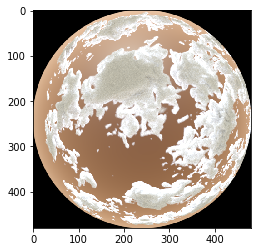

In [3]:
directory = '/data/lasso/sims/20160611/'
fname = 'indiv_frames/30600_9600_TSI_R_10.png'
# Import image
img = cv2.imread(directory + fname)
img = img[80:560,:,:]
img = img.astype(np.int)
plt.imshow(img, cmap = 'gray', vmin=0, vmax=255)
plt.show()

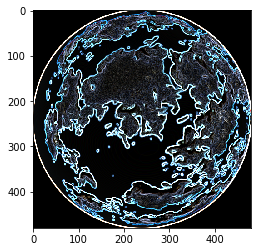

In [4]:
# Convert image to grayscale
gray = (img[:,:,0] + img[:,:,1] + img[:,:,2])/3
# Define kernels
Kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
# Compute gradients
Gx = matConv(Kx, img)
Gy = matConv(Ky, img)

edge = np.round(np.sqrt(Gx**2 + Gy**2, dtype = np.float))
edge = edge.astype(np.int)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            edge[i,j,k] = min(255, edge[i,j,k])
plt.imshow(edge)
plt.savefig('edge.png')
plt.show()

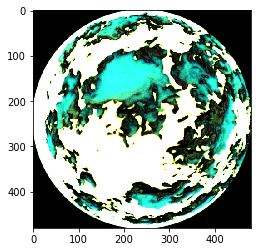

In [9]:
result = np.abs(sobel(img))
for i in range(480):
    for j in range(480):
        for k in range(3):
            result[i,j,k] = np.min([255, result[i,j,k]])
plt.imshow(result)
plt.show()

float64


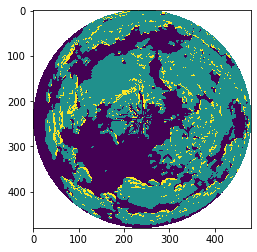

In [30]:
lbs_fname = 'labels30600_9600.npy'
labels = np.load(directory + lbs_fname)

temp = np.zeros_like(labels)

for l in range(11):
    for i in range(480):
        for j in range(480):
            temp[i,j,l] = labels[j,i,l]

    temp[:,:,l] = np.flipud(temp[:,:,l])

labels = temp

lb = labels[:,:,0]
print(lb.dtype)
plt.imshow(lb)

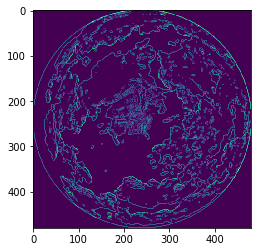

In [32]:
N = np.isnan(lb)
lb[N == True] = 0.
lbGx = matConv(Kx, lb)
lbGy = matConv(Ky, lb)
lbEdge = np.round(np.sqrt(lbGx**2 + lbGy**2, dtype = np.float))
lbEdge = lbEdge.astype(np.int)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            lbEdge[i,j] = min(255, lbEdge[i,j])

plt.imshow(lbEdge)

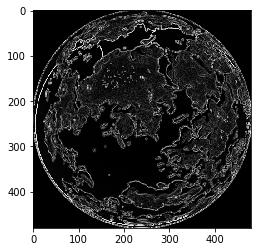

In [30]:
plt.imshow(edge, cmap = plt.cm.binary_r)
plt.show()

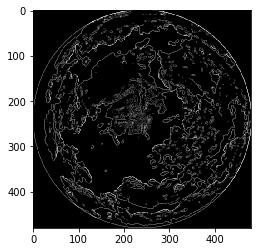

In [31]:
plt.imshow(lbEdge, cmap = plt.cm.binary_r)
plt.show()